# IMDB 리뷰 감성 분류(IMDB Movie Review Sentiment Analysis)

## 데이터 이해

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import imdb

In [2]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
( X_train, y_train ), ( X_test, y_test ) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

In [3]:
print( '훈련용 리뷰 개수 : {}'.format( len( X_train ) ) )
print( '테스트용 리뷰 개수 : {}'.format( len( X_test ) ) )
num_classes = max( y_train ) + 1
print( '카테고리 : {}'.format( num_classes ) )

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print( X_train[ 0 ] )
print( y_train[ 0 ] )

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


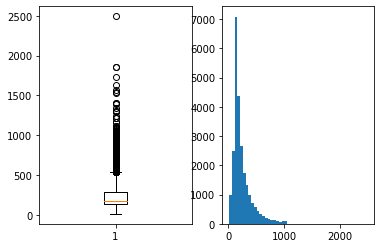

In [5]:
len_result = [ len( s ) for s in X_train ]

print('리뷰의 최대 길이 : {}'.format( np.max( len_result ) ) )
print('리뷰의 평균 길이 : {}'.format (np.mean( len_result ) ) )

plt.subplot( 1, 2, 1 )
plt.boxplot( len_result )
plt.subplot( 1, 2, 2 )
plt.hist( len_result, bins = 50 )
plt.show()

In [6]:
unique_elements, counts_elements = np.unique( y_train, return_counts = True )
print( "각 레이블에 대한 빈도수: " )
print( np.asarray( ( unique_elements, counts_elements ) ) )

각 레이블에 대한 빈도수: 
[[    0     1]
 [12500 12500]]


In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[ value ] = key

1646592/1641221 [==============================] - 1s 0us/step


In [8]:
print( '빈도수 상위 1번 단어 : {}'.format( index_to_word[ 1 ] ) )

빈도수 상위 1번 단어 : the


In [9]:
print( '빈도수 상위 3941번 단어 : {}'.format( index_to_word[ 3941 ] ) )

빈도수 상위 3941번 단어 : journalist


In [10]:
print( ' '.join( [ index_to_word[ X ] for X in X_train[ 0 ] ] ) )

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

## LSTM으로 IMDB 리뷰 감성 분류

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [12]:
( X_train, y_train ), ( X_test, y_test ) = imdb.load_data( num_words = 5000 )

In [13]:
max_len = 500
X_train = pad_sequences( X_train, maxlen = max_len )
X_test = pad_sequences( X_test, maxlen = max_len )

In [17]:
model = Sequential()
model.add( Embedding( 5000, 120 ) )
model.add( LSTM( 120 ) )
model.add( Dense( 1, activation = 'sigmoid' ) )

In [18]:
es = EarlyStopping( monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4 )
mc = ModelCheckpoint( 'best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True )

In [19]:
model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = [ 'acc' ] )
model.fit( X_train, y_train, validation_data = ( X_test, y_test ), epochs = 10, batch_size = 64, callbacks = [ es, mc ] )

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
24960/25000 [============================>.] - ETA: 5s - loss: 0.4588 - acc: 0.7784 
Epoch 00001: val_acc improved from -inf to 0.84560, saving model to best_model.h5
25000/25000 [==============================] - 3771s 151ms/sample - loss: 0.4588 - acc: 0.7784 - val_loss: 0.3640 - val_acc: 0.8456
Epoch 2/10
24960/25000 [============================>.] - ETA: 5s - loss: 0.2975 - acc: 0.8785 
Epoch 00002: val_acc did not improve from 0.84560
25000/25000 [==============================] - 3404s 136ms/sample - loss: 0.2981 - acc: 0.8784 - val_loss: 0.4605 - val_acc: 0.8387
Epoch 3/10
24960/25000 [============================>.] - ETA: 4s - loss: 0.2500 - acc: 0.8983 
Epoch 00003: val_acc improved from 0.84560 to 0.85416, saving model to best_model.h5
25000/25000 [==============================] - 3267s 131ms/sample - loss: 0.2503 - acc: 0.8982 - val_loss: 0.3422 - val_acc: 0.8542
Epoch 4/10
23296/25000 [=========================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\Anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-e96a4c1087a5>", line 2, in <module>
    model.fit( X_train, y_train, validation_data = ( X_test, y_test ), epochs = 10, batch_size = 64, callbacks = [ es, mc ] )
  File "d:\Anaconda3\envs\nlp\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "d:\Anaconda3\envs\nlp\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "d:\Anaconda3\envs\nlp\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "d:\Anaconda3\envs\nlp\lib\site-packages\tensorflow_core\python\keras\engine\training_v2_utils.py", line 86, in execution_function
  

KeyboardInterrupt: 

In [ ]:
loaded_model = load_model( 'best_model.h5' )
print( "\n 테스트 정확도: %.4f" % ( loaded_model.evaluate( X_test, y_test )[ 1 ] ) )